In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv('uber.csv')

# Display the first few rows
df


,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 8:22:21,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5
...,...,...,...,...,...,...,...,...,...
199995,42598914,2012-10-28 10:49:00,3.0,2012-10-28 10:49:00 UTC,-73.987042,40.739367,-73.986525,40.740297,1
199996,16382965,2014-03-14 1:09:00,7.5,2014-03-14 01:09:00 UTC,-73.984722,40.736837,-74.006672,40.739620,1
199997,27804658,2009-06-29 0:42:00,30.9,2009-06-29 00:42:00 UTC,-73.986017,40.756487,-73.858957,40.692588,2
199998,20259894,2015-05-20 14:56:25,14.5,2015-05-20 14:56:25 UTC,-73.997124,40.725452,-73.983215,40.695416,1


In [ ]:
# Check for missing values
print(df.isnull().sum())

# # Drop rows with missing values (or you can impute them)
df = df.dropna()

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64


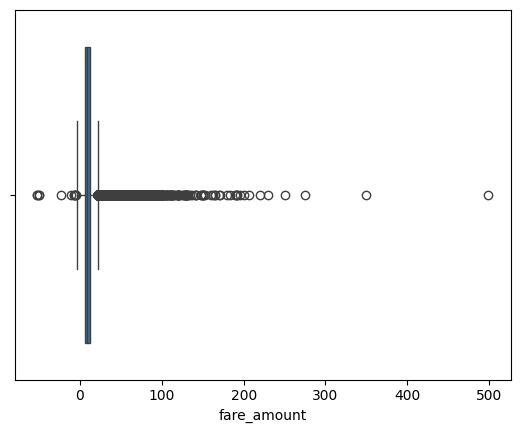

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(x=df['fare_amount'])
plt.show()

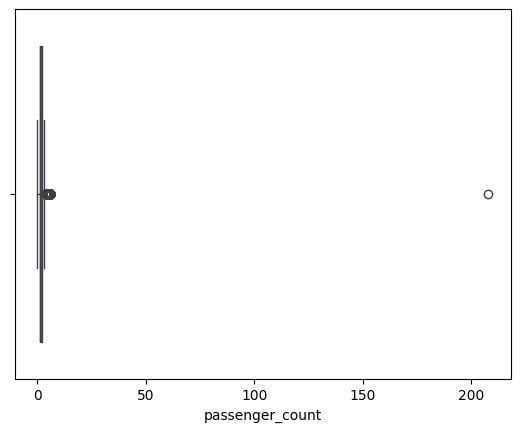

In [ ]:
sns.boxplot(x=df['passenger_count'])
plt.show()

In [ ]:
Q1 = df['fare_amount'].quantile(0.25)
Q3 = df['fare_amount'].quantile(0.75)
IQR = Q3 - Q1

df = df[~((df['fare_amount'] < (Q1 - 1.5 * IQR)) | (df['fare_amount'] > (Q3 + 1.5 * IQR)))]

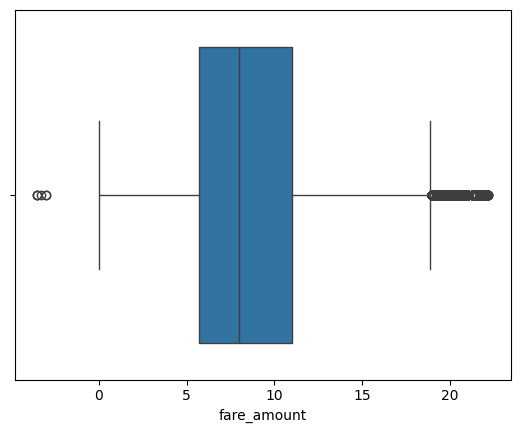

In [ ]:
sns.boxplot(x=df['fare_amount'])
plt.show()

In [ ]:
import numpy as np

def haversine(lon1, lat1, lon2, lat2):
    R = 6371  # Radius of the Earth in km
    lon1, lon2 = np.radians(lon1), np.radians(lon2)
    lat1, lat2 = np.radians(lat1), np.radians(lat2)

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = np.sin(dlat/2) ** 2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2) ** 2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))

    return R * c

df['distance'] = haversine(df['pickup_longitude'], df['pickup_latitude'],
                           df['dropoff_longitude'], df['dropoff_latitude'])


In [ ]:
df

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance
0,24238194,2015-05-07 19:52:06,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1,1.683323
1,27835199,2009-07-17 20:04:56,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1,2.457590
2,44984355,2009-08-24 21:45:00,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1,5.036377
3,25894730,2009-06-26 8:22:21,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3,1.661683
4,17610152,2014-08-28 17:47:00,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5,4.475450
...,...,...,...,...,...,...,...,...,...,...
199994,3189201,2014-01-31 14:42:00,12.0,2014-01-31 14:42:00 UTC,-73.983070,40.760770,-73.972972,40.754177,1,1.122878
199995,42598914,2012-10-28 10:49:00,3.0,2012-10-28 10:49:00 UTC,-73.987042,40.739367,-73.986525,40.740297,1,0.112210
199996,16382965,2014-03-14 1:09:00,7.5,2014-03-14 01:09:00 UTC,-73.984722,40.736837,-74.006672,40.739620,1,1.875050
199998,20259894,2015-05-20 14:56:25,14.5,2015-05-20 14:56:25 UTC,-73.997124,40.725452,-73.983215,40.695416,1,3.539715


In [ ]:
from sklearn.model_selection import train_test_split

# Features
X = df[['distance', 'passenger_count']]

# Target
y = df['fare_amount']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the model
lr = LinearRegression()

# Train the model
lr.fit(X_train, y_train)

# Predict
y_pred_lr = lr.predict(X_test)

# Evaluate the model
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
r2_lr = r2_score(y_test, y_pred_lr)

print(f"Linear Regression - RMSE: {rmse_lr}, R2: {r2_lr}")

Linear Regression - RMSE: 4.1366470081480555, R2: 7.198709675637627e-05


In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the model
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf.fit(X_train, y_train)

# Predict
y_pred_rf = rf.predict(X_test)

# Evaluate the model
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest Regression - RMSE: {rmse_rf}, R2: {r2_rf}")

Random Forest Regression - RMSE: 2.746790286188881, R2: 0.5591175461156537


In [ ]:
print(f"Linear Regression - RMSE: {rmse_lr}, R2: {r2_lr}")
print(f"Random Forest Regression - RMSE: {rmse_rf}, R2: {r2_rf}")

Linear Regression - RMSE: 4.1366470081480555, R2: 7.198709675637627e-05
Random Forest Regression - RMSE: 2.746790286188881, R2: 0.5591175461156537
